In [363]:
# Import libraries 
import pandas as pd
import numpy as np
import time
import gc
import warnings
warnings.filterwarnings("ignore")
import scikitplot as scikitplot
import scikitplot.plotters as skplt
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn import tree
import category_encoders as ce
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from tqdm import tqdm

pd.pandas.set_option('display.max_columns', None)

from datetime import date
from datetime import datetime

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn import ensemble

In [364]:
import codecs
# df = pd.read_csv(codecs.open("train.csv", "r",encoding='utf-8', errors='ignore'))
df = pd.read_csv("https://raw.githubusercontent.com/saimadhu-polamuri/DataHakthon3X/" \
                   "master/dataSet/Train.csv",sep=",",encoding="latin1")

In [365]:
# kolumny 'ID' oraz LoggedIn' zostają usunięte z bazy (numer klienta, informacja o targecie)
df = df.drop(["ID","LoggedIn"], axis=1)

In [366]:
# kolumny 'VAR' zostają usunięte z bazy nie znane znaczenie biznesowe
df = df.drop(["Var1","Var2","Var4","Var5"], axis=1)

In [367]:
#zmiana nazwy zmiennej celu na target
df = df.rename(columns={"Disbursed": "target"})

In [368]:
def podstawowe_informacje_z_bazy(df):
    print("------------------------------------------------------------------------------------------------------")
    print("------------------------------------------------------------------------------------------------------")
    print("Wymiar bazy:")
    print("------------------------------------------------------------------------------------------------------\n")
    print("{} wierszy {} kolumn\n".format(df.shape[0], df.shape[1]))
    print("------------------------------------------------------------------------------------------------------")
    print("------------------------------------------------------------------------------------------------------")
    print("Pierwsze 3 rekordy z bazy:")
    print("------------------------------------------------------------------------------------------------------")
    display(df.head(3))
    print("------------------------------------------------------------------------------------------------------")
    print("------------------------------------------------------------------------------------------------------")
    print("Ostatnie 3 rekordy z bazy:")
    print("------------------------------------------------------------------------------------------------------")
    display(df.tail(3))
    print("------------------------------------------------------------------------------------------------------")
    print("------------------------------------------------------------------------------------------------------")
    print("Kolumny w bazie:")
    print("------------------------------------------------------------------------------------------------------")
    display(df.columns.tolist())
    print("------------------------------------------------------------------------------------------------------")
    print("------------------------------------------------------------------------------------------------------")
    print("Podstawowe informacje z danych:")
    print("------------------------------------------------------------------------------------------------------")
    display(df.info())
    print("------------------------------------------------------------------------------------------------------")
    print("------------------------------------------------------------------------------------------------------")
    print("Podstawowe agregaty na danych numerycznych z bazy:")
    print("------------------------------------------------------------------------------------------------------")
    display(df.describe())
    print("------------------------------------------------------------------------------------------------------")
    print("------------------------------------------------------------------------------------------------------")
    print("Podstawowe agregaty na wszystkich danych z bazy:")
    print("------------------------------------------------------------------------------------------------------")
    display(df.describe(include="all"))
    print("------------------------------------------------------------------------------------------------------")
    print("------------------------------------------------------------------------------------------------------")
    print("Liczba brakow danych w kolumnach:")
    print("------------------------------------------------------------------------------------------------------")
    display(df.isnull().sum())
    print("------------------------------------------------------------------------------------------------------")
    print("------------------------------------------------------------------------------------------------------")
    print("Poziom zmiennej celu (target):")
    print("------------------------------------------------------------------------------------------------------")
    display(df.target.value_counts(normalize=True))
    print("------------------------------------------------------------------------------------------------------")
    print("------------------------------------------------------------------------------------------------------")

In [369]:
podstawowe_informacje_z_bazy(df)

------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
Wymiar bazy:
------------------------------------------------------------------------------------------------------

87020 wierszy 20 kolumn

------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
Pierwsze 3 rekordy z bazy:
------------------------------------------------------------------------------------------------------


,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,Salary_Account,Mobile_Verified,Loan_Amount_Submitted,Loan_Tenure_Submitted,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Source,target
0,Female,Delhi,20000,23-May-78,15-May-15,300000.0,5.0,0.0,CYBOSOL,HDFC Bank,N,NaN,NaN,NaN,NaN,NaN,N,Web-browser,S122,0
1,Male,Mumbai,35000,07-Oct-85,04-May-15,200000.0,2.0,0.0,TATA CONSULTANCY SERVICES LTD (TCS),ICICI Bank,Y,200000.0,2.0,13.25,NaN,6762.9,N,Web-browser,S122,0
2,Male,Panchkula,22500,10-Oct-81,19-May-15,600000.0,4.0,0.0,ALCHEMIST HOSPITALS LTD,State Bank of India,Y,450000.0,4.0,NaN,NaN,NaN,N,Web-browser,S143,0


------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
Ostatnie 3 rekordy z bazy:
------------------------------------------------------------------------------------------------------


,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,Salary_Account,Mobile_Verified,Loan_Amount_Submitted,Loan_Tenure_Submitted,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Source,target
87017,Male,Bengaluru,118000,28-Jan-72,31-Jul-15,0.0,0.0,0.0,BANGALORE INSTITUTE OF TECHNOLOGY,Syndicate Bank,Y,1200000.0,4.0,NaN,NaN,NaN,N,Mobile,S122,0
87018,Male,Bengaluru,98930,27-Apr-77,31-Jul-15,800000.0,5.0,13660.0,FIRSTSOURCE SOLUTION LTD,ICICI Bank,Y,800000.0,5.0,NaN,NaN,NaN,N,Web-browser,S122,0
87019,Male,Mumbai,42300,31-Oct-88,31-Jul-15,0.0,0.0,0.0,GOVERNMENT OF INDIA,NaN,Y,690000.0,4.0,13.99,3450.0,18851.81,N,Web-browser,S122,0


------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
Kolumny w bazie:
------------------------------------------------------------------------------------------------------


['Gender',
 'City',
 'Monthly_Income',
 'DOB',
 'Lead_Creation_Date',
 'Loan_Amount_Applied',
 'Loan_Tenure_Applied',
 'Existing_EMI',
 'Employer_Name',
 'Salary_Account',
 'Mobile_Verified',
 'Loan_Amount_Submitted',
 'Loan_Tenure_Submitted',
 'Interest_Rate',
 'Processing_Fee',
 'EMI_Loan_Submitted',
 'Filled_Form',
 'Device_Type',
 'Source',
 'target']

------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
Podstawowe informacje z danych:
------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87020 entries, 0 to 87019
Data columns (total 20 columns):
Gender                   87020 non-null object
City                     86017 non-null object
Monthly_Income           87020 non-null int64
DOB                      87020 non-null object
Lead_Creation_Date       87020 non-null object
Loan_Amount_Applied      86949 non-null float64
Loan_Tenure_Applied      86949 non-null float64
Existing_EMI             86949 non-null float64
Employer_Name            86949 non-null object
Salary_Account           75256 non-null object
Mobile_Verified          87020 non-null object
Loan_Amount_Submitted    52407 

None

------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
Podstawowe agregaty na danych numerycznych z bazy:
------------------------------------------------------------------------------------------------------


,Monthly_Income,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Loan_Amount_Submitted,Loan_Tenure_Submitted,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,target
count,8.702000e+04,8.694900e+04,86949.000000,8.694900e+04,5.240700e+04,52407.000000,27726.000000,27420.000000,27726.000000,87020.000000
mean,5.884997e+04,2.302507e+05,2.131399,3.696228e+03,3.950106e+05,3.891369,19.197474,5131.150839,10999.528377,0.014629
std,2.177511e+06,3.542068e+05,2.014193,3.981021e+04,3.082481e+05,1.165359,5.834213,4725.837644,7512.323050,0.120062
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,5.000000e+04,1.000000,11.990000,200.000000,1176.410000,0.000000
25%,1.650000e+04,0.000000e+00,0.000000,0.000000e+00,2.000000e+05,3.000000,15.250000,2000.000000,6491.600000,0.000000
50%,2.500000e+04,1.000000e+05,2.000000,0.000000e+00,3.000000e+05,4.000000,18.000000,4000.000000,9392.970000,0.000000
75%,4.000000e+04,3.000000e+05,4.000000,3.500000e+03,5.000000e+05,5.000000,20.000000,6250.000000,12919.040000,0.000000
max,4.445544e+08,1.000000e+07,10.000000,1.000000e+07,3.000000e+06,6.000000,37.000000,50000.000000,144748.280000,1.000000


------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
Podstawowe agregaty na wszystkich danych z bazy:
------------------------------------------------------------------------------------------------------


,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,Salary_Account,Mobile_Verified,Loan_Amount_Submitted,Loan_Tenure_Submitted,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Source,target
count,87020,86017,8.702000e+04,87020,87020,8.694900e+04,86949.000000,8.694900e+04,86949,75256,87020,5.240700e+04,52407.000000,27726.000000,27420.000000,27726.000000,87020,87020,87020,87020.000000
unique,2,697,NaN,11345,92,NaN,NaN,NaN,43567,57,2,NaN,NaN,NaN,NaN,NaN,2,2,30,NaN
top,Male,Delhi,NaN,11-Nov-80,03-Jul-15,NaN,NaN,NaN,0,HDFC Bank,Y,NaN,NaN,NaN,NaN,NaN,N,Web-browser,S122,NaN
freq,49848,12527,NaN,306,2315,NaN,NaN,NaN,4914,17695,56481,NaN,NaN,NaN,NaN,NaN,67530,64316,38567,NaN
mean,NaN,NaN,5.884997e+04,NaN,NaN,2.302507e+05,2.131399,3.696228e+03,NaN,NaN,NaN,3.950106e+05,3.891369,19.197474,5131.150839,10999.528377,NaN,NaN,NaN,0.014629
std,NaN,NaN,2.177511e+06,NaN,NaN,3.542068e+05,2.014193,3.981021e+04,NaN,NaN,NaN,3.082481e+05,1.165359,5.834213,4725.837644,7512.323050,NaN,NaN,NaN,0.120062
min,NaN,NaN,0.000000e+00,NaN,NaN,0.000000e+00,0.000000,0.000000e+00,NaN,NaN,NaN,5.000000e+04,1.000000,11.990000,200.000000,1176.410000,NaN,NaN,NaN,0.000000
25%,NaN,NaN,1.650000e+04,NaN,NaN,0.000000e+00,0.000000,0.000000e+00,NaN,NaN,NaN,2.000000e+05,3.000000,15.250000,2000.000000,6491.600000,NaN,NaN,NaN,0.000000
50%,NaN,NaN,2.500000e+04,NaN,NaN,1.000000e+05,2.000000,0.000000e+00,NaN,NaN,NaN,3.000000e+05,4.000000,18.000000,4000.000000,9392.970000,NaN,NaN,NaN,0.000000
75%,NaN,NaN,4.000000e+04,NaN,NaN,3.000000e+05,4.000000,3.500000e+03,NaN,NaN,NaN,5.000000e+05,5.000000,20.000000,6250.000000,12919.040000,NaN,NaN,NaN,0.000000


------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
Liczba brakow danych w kolumnach:
------------------------------------------------------------------------------------------------------


Gender                       0
City                      1003
Monthly_Income               0
DOB                          0
Lead_Creation_Date           0
Loan_Amount_Applied         71
Loan_Tenure_Applied         71
Existing_EMI                71
Employer_Name               71
Salary_Account           11764
Mobile_Verified              0
Loan_Amount_Submitted    34613
Loan_Tenure_Submitted    34613
Interest_Rate            59294
Processing_Fee           59600
EMI_Loan_Submitted       59294
Filled_Form                  0
Device_Type                  0
Source                       0
target                       0
dtype: int64

------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
Poziom zmiennej celu (target):
------------------------------------------------------------------------------------------------------


0    0.985371
1    0.014629
Name: target, dtype: float64

------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------


In [370]:
def unikalne_wartosci(zmienna):
    print('{} - liczba unikalnych wartosci: {}, liczba wszystkich wartosci: {}, , typ zmiennej: {}\n'.format(zmienna, df[zmienna].nunique(),df[zmienna].count(),df[zmienna].dtype))

In [371]:
for zmienne in df.columns.tolist():
    unikalne_wartosci(zmienne)

Gender - liczba unikalnych wartosci: 2, liczba wszystkich wartosci: 87020, , typ zmiennej: object

City - liczba unikalnych wartosci: 697, liczba wszystkich wartosci: 86017, , typ zmiennej: object

Monthly_Income - liczba unikalnych wartosci: 5825, liczba wszystkich wartosci: 87020, , typ zmiennej: int64

DOB - liczba unikalnych wartosci: 11345, liczba wszystkich wartosci: 87020, , typ zmiennej: object

Lead_Creation_Date - liczba unikalnych wartosci: 92, liczba wszystkich wartosci: 87020, , typ zmiennej: object

Loan_Amount_Applied - liczba unikalnych wartosci: 277, liczba wszystkich wartosci: 86949, , typ zmiennej: float64

Loan_Tenure_Applied - liczba unikalnych wartosci: 11, liczba wszystkich wartosci: 86949, , typ zmiennej: float64

Existing_EMI - liczba unikalnych wartosci: 3753, liczba wszystkich wartosci: 86949, , typ zmiennej: float64

Employer_Name - liczba unikalnych wartosci: 43567, liczba wszystkich wartosci: 86949, , typ zmiennej: object

Salary_Account - liczba unikalnyc

In [372]:
#zmiana dat na bardziej intuicyjne zmienne

In [373]:
def data_rok(df,zmienna,nowa_zmienna):
    df[zmienna] = pd.to_datetime(df[zmienna], errors='coerce', dayfirst=True)
    today = pd.to_datetime('now')
    df[nowa_zmienna] = (today.year - df[zmienna].dt.year) - ((today.month - df[zmienna].dt.month) <0)
    df[nowa_zmienna] = df[nowa_zmienna].apply(lambda x: np.nan if x < 0 else x)
    df = df.drop([zmienna], axis=1)
    return df

In [374]:
df = data_rok(df,'DOB','wiek')

In [375]:
def data_dzien(df,zmienna,nowa_zmienna):
    df[zmienna] = pd.to_datetime(df[zmienna], errors='coerce', dayfirst=True)
    today = pd.to_datetime('now')
    df[nowa_zmienna] = (today - df[zmienna]).astype('timedelta64[D]').astype(int)
    df[nowa_zmienna] = df[nowa_zmienna].apply(lambda x: np.nan if x < 0 else x)
    df = df.drop([zmienna], axis=1)
    return df

In [376]:
df = data_dzien(df,'Lead_Creation_Date','l_dni_od_LCD')

In [377]:
# podzial na zbiory

In [378]:
X = df  
y = df.target

In [379]:
def dummies(data,zmienna):
    dummies = pd.get_dummies(data[zmienna], prefix = zmienna, dummy_na=True)
    data = pd.concat([data, dummies], axis = 1)
    data = data.drop([zmienna], axis=1)
    return data

In [380]:
X = dummies(X,'Gender')                  
X = dummies(X,'City')                                   
X = dummies(X,'Salary_Account')           
X = dummies(X,'Mobile_Verified')                       
X = dummies(X,'Filled_Form')                 
X = dummies(X,'Device_Type')                                       
X = dummies(X,'Source')                                                                  

In [381]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=1234)

In [382]:
#imputacja za pomoca sedniej srednia ze zbioru treningowego - imutacja na treningowym i testowym

In [383]:
def imputacja_avg(data1,data2,zmienna):
    avg = X_train[zmienna].mean()
    data1[zmienna]=data1[zmienna].apply(lambda x: avg if pd.isnull(x)  else x)
    data2[zmienna]=data2[zmienna].apply(lambda x: avg if pd.isnull(x)  else x)

In [384]:
#kategoryzacja zmiennych za pomoca drzewa - drzewo nauczone na treningowym, 
#zapisane do pickla nastepnie odczytane i kategoryzacja zastosowana z=na zbiorze testowym

In [385]:
def kategoryzacja_zmiennej(data1,data2, zmienna):
    level_grouper = DecisionTreeClassifier(min_samples_leaf=100, max_leaf_nodes=10)
    level_grouper.fit(data1[zmienna].values.reshape(-1,1), data1.target)
    filename = 'kat_zmiennej_'+zmienna+'.sav'
    pickle.dump(level_grouper, open(filename, 'wb'))
    data1[zmienna] = level_grouper.apply(data1[zmienna].values.reshape(-1,1)).astype(str)
    loaded_model = pickle.load(open('kat_zmiennej_'+zmienna+'.sav', 'rb'))
    data2[zmienna] = loaded_model.apply(data2[zmienna].values.reshape(-1,1)).astype(str)
    return

In [386]:
imputacja_avg(X_train,X_test,'Monthly_Income')
imputacja_avg(X_train,X_test,'Loan_Amount_Applied')
imputacja_avg(X_train,X_test,'Loan_Tenure_Applied')
imputacja_avg(X_train,X_test,'Existing_EMI')
#imputacja_avg(X_train,X_test,'Var5')
imputacja_avg(X_train,X_test,'Loan_Amount_Submitted')
imputacja_avg(X_train,X_test,'Loan_Tenure_Submitted')
imputacja_avg(X_train,X_test,'Interest_Rate')
imputacja_avg(X_train,X_test,'Processing_Fee')
imputacja_avg(X_train,X_test,'EMI_Loan_Submitted')
#imputacja_avg(X_train,X_test,'Var4')
imputacja_avg(X_train,X_test,'wiek')
imputacja_avg(X_train,X_test,'l_dni_od_LCD')

In [387]:
kategoryzacja_zmiennej(X_train,X_test,'Monthly_Income')
kategoryzacja_zmiennej(X_train,X_test,'Loan_Amount_Applied')
kategoryzacja_zmiennej(X_train,X_test,'Loan_Tenure_Applied')
kategoryzacja_zmiennej(X_train,X_test,'Existing_EMI')
#kategoryzacja_zmiennej(X_train,X_test,'Var5')
kategoryzacja_zmiennej(X_train,X_test,'Loan_Amount_Submitted')
kategoryzacja_zmiennej(X_train,X_test,'Loan_Tenure_Submitted')
kategoryzacja_zmiennej(X_train,X_test,'Interest_Rate')
kategoryzacja_zmiennej(X_train,X_test,'Processing_Fee')
kategoryzacja_zmiennej(X_train,X_test,'EMI_Loan_Submitted')
#kategoryzacja_zmiennej(X_train,X_test,'Var4')
kategoryzacja_zmiennej(X_train,X_test,'wiek')
kategoryzacja_zmiennej(X_train,X_test,'l_dni_od_LCD')

In [388]:
def dummies(data,zmienna):
    dummies = pd.get_dummies(data[zmienna], prefix = zmienna, dummy_na=True)
    data = pd.concat([data, dummies], axis = 1)
    data = data.drop([zmienna], axis=1)
    return data

In [389]:
# X_train = dummies(X_train,'Gender')                  
# X_train = dummies(X_train,'City')                     
X_train = dummies(X_train,'Monthly_Income')              
X_train = dummies(X_train,'Loan_Amount_Applied')         
X_train = dummies(X_train,'Loan_Tenure_Applied')         
X_train = dummies(X_train,'Existing_EMI')                
#X_train = dummies(X_train,'Employer_Name')              
# X_train = dummies(X_train,'Salary_Account')           
# X_train = dummies(X_train,'Mobile_Verified')             
#X_train = dummies(X_train,'Var5')                        
#X_train = dummies(X_train,'Var1')                        
X_train = dummies(X_train,'Loan_Amount_Submitted')       
X_train = dummies(X_train,'Loan_Tenure_Submitted')       
X_train = dummies(X_train,'Interest_Rate')               
X_train = dummies(X_train,'Processing_Fee')              
X_train = dummies(X_train,'EMI_Loan_Submitted')          
# X_train = dummies(X_train,'Filled_Form')                 
# X_train = dummies(X_train,'Device_Type')                 
#X_train = dummies(X_train,'Var2')                        
# X_train = dummies(X_train,'Source')                      
#X_train = dummies(X_train,'Var4')                                             
X_train = dummies(X_train,'wiek')                        
X_train = dummies(X_train,'l_dni_od_LCD')  

In [390]:
#X_test = dummies(X_test,'Gender')                  
#X_test = dummies(X_test,'City')                     
X_test = dummies(X_test,'Monthly_Income')              
X_test = dummies(X_test,'Loan_Amount_Applied')         
X_test = dummies(X_test,'Loan_Tenure_Applied')         
X_test = dummies(X_test,'Existing_EMI')                
#X_test = dummies(X_test,'Employer_Name')              
#X_test = dummies(X_test,'Salary_Account')           
#X_test = dummies(X_test,'Mobile_Verified')             
#X_test = dummies(X_test,'Var5')                        
#X_test = dummies(X_test,'Var1')                        
X_test = dummies(X_test,'Loan_Amount_Submitted')       
X_test = dummies(X_test,'Loan_Tenure_Submitted')       
X_test = dummies(X_test,'Interest_Rate')               
X_test = dummies(X_test,'Processing_Fee')              
X_test = dummies(X_test,'EMI_Loan_Submitted')          
#X_test = dummies(X_test,'Filled_Form')                 
#X_test = dummies(X_test,'Device_Type')                 
#X_test = dummies(X_test,'Var2')                        
#X_test = dummies(X_test,'Source')                      
#X_test = dummies(X_test,'Var4')                                             
X_test = dummies(X_test,'wiek')                        
X_test = dummies(X_test,'l_dni_od_LCD') 

In [391]:
X_train = X_train.drop(["target"], axis=1)
X_train = X_train.drop(["Employer_Name"], axis=1)
X_test = X_test.drop(["target"], axis=1)
X_test = X_test.drop(["Employer_Name"], axis=1)

In [392]:
podstawowe_informacje_z_bazy(X_train)

------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
Wymiar bazy:
------------------------------------------------------------------------------------------------------

60914 wierszy 912 kolumn

------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
Pierwsze 3 rekordy z bazy:
------------------------------------------------------------------------------------------------------


,Gender_Female,Gender_Male,Gender_nan,City_ADIPUR,City_AHMEDB,City_AMALSAD,City_ANJAR,City_Abohar,City_Adilabad,City_Agartala,City_Agra,City_Ahmedabad,City_Ahmednagar,City_Aizawl,City_Ajmer,City_Akola,City_Alappuzha,City_Aligarh,City_Allahabad,City_Alleppey,City_Almora,City_Aluva,City_Alwar,City_Amareli,City_Ambala,City_Ambedkar Nagar,City_Ambikapur,City_Ambur,City_Amravati,City_Amreli,City_Amritsar,City_Anand,City_Anantapur,City_Anantnag,City_Andman & Nicobar,City_Angul,City_Anjaw,City_Ankleshwar,City_Anuppur,City_Araria,City_Ariyalur,City_Asansol,City_Ashoknagar,City_Auraiya,City_Aurangabad,City_Azamgarh,City_BAJWA,City_BARDOLI,City_BHACHAU,City_BHILAD,City_BILIMORA,City_Badaun,City_Baddi,City_Bagalkote,City_Bageshwar,City_Bagpat,City_Bahadurgarh,City_Bahraich,City_Baksa,City_Balaghat,City_Balasore,City_Baleswar,City_Ballia,City_Banaskantha,City_Banaskhantha,City_Banda,City_Bandipore,City_Banka,City_Bankura,City_Banswara,City_Barabanki,City_Baramati,City_Baramulla,City_Baran,City_Bardhaman,City_Bareilly,City_Bargarh,City_Barmer,City_Barnala,City_Barpeta,City_Barwani,City_Bastar,City_Basti,City_Bathinda,City_Beawar,City_Beed,City_Begusarai,City_Behrampur,City_Belgaum,City_Bellary,City_Bengaluru,City_Bettiah,City_Betul,City_Bhadrak,City_Bhagalpur,City_Bhandara,City_Bharatpur,City_Bharuch,City_Bhavnagar,City_Bhilai,City_Bhilwara,City_Bhind,City_Bhiwadi,City_Bhiwani,City_Bhojpur,City_Bhopal,City_Bhubaneswar,City_Bhuj,City_Bidar,City_Bijapur,City_Bijnor,City_Bikaner,City_Bilaspur,City_Birbhum,City_Bokaro,City_Bolangir,City_Bomdila,City_Bongaigaon,City_Boudh,City_Bulandshahr,City_Buldhana,City_Bundi,City_Burdwan,City_Burhanpur,City_Buxar,City_CHIKHLI (GUJ.),City_CHOTILA,City_Cachar,City_Chamarajanagar,City_Chamoli,City_Champawat,City_Chandauli,City_Chandel,City_Chandigarh,City_Chandrapur,City_Chapra,City_Chatra,City_Chennai,City_Chhatarpur,City_Chhindwara,City_Chidambaram,City_Chikkaballapur,City_Chikkamagaluru,City_Chinnamiram,City_Chitradurga,City_Chitrakoot,City_Chittoor,City_Chittorgarh,City_Churachandpur,City_Churu,City_Coimbatore,City_Cooch Behar,City_Cuddalore,City_Cuttack,City_DEESA,City_DHANDHUKA,City_DHANGARDHA,City_DHORAJI,City_DWARKA,City_Dadra & nagar Haveli,City_Dahod,City_Dakshin Dinajpur,City_Dakshina Kannada,City_Daman,City_Daman & Diu,City_Damanjodi,City_Damoh,City_Dantewada,City_Darbhanga,City_Darjeeling,City_Darrang,City_Datia,City_Dausa,City_Davanagere,City_Dehradun,City_Delhi,City_Deogarh,City_Deoghar,City_Deoria,City_Dewas,City_Dhalai,City_Dhamtari,City_Dhanbad,City_Dhar,City_Dharmapuri,City_Dharwad,City_Dhenkanal,City_Dholpur,City_Dhubri,City_Dhule,City_Dibrugarh,City_Dimapur,City_Dindigul,City_Dindori,City_Doda,City_Dumka,City_Dungarpur,City_Durg,City_Durgapur,City_East Godavari,City_East Khasi Hills,City_East Singhbhum,City_Ernakulam,City_Erode,City_Etah,City_Etawah,City_Faizabad,City_Faridabad,City_Faridkot,City_Farrukhabad,City_Fatehabad,City_Fatehgarh Sahib,City_Fatehpur,City_Fazilka,City_Firozabad,City_Firozpur,City_GANDEVI,City_GODHRA,City_Gadag,City_Gadchiroli,City_Gadwal,City_Gajapati,City_Gandhi Nagar,City_Gandhidham,City_Gandhinagar,City_Ganganagar,City_Gangtok,City_Ganjam,City_Garhwa,City_Gautam Buddha Nagar,City_Gaya,City_Ghaziabad,City_Ghazipur,City_Giridih,City_Goa,City_Goalpara,City_Godda,City_Golaghat,City_Gonda,City_Gondia,City_Gopal Ganj,City_Gorakhpur,City_Gorkakhpur,City_Gulbarga,City_Gumla,City_Guna,City_Guntur,City_Gurdaspur,City_Gurgaon,City_Guwahati,City_Gwalior,City_Hailakandi,City_Hajipur,City_Haldwani,City_Halol,City_Hamirpur,City_Hanumangarh,City_Hapur,City_Harda,City_Hardoi,City_Haridwar,City_Hassan,City_Haveri,City_Hazaribagh,City_Himatnagar,City_Hingoli,City_Hisar,City_Hooghly,City_Hoshangabad,City_Hoshiarpur,City_Hospet,City_Hosur,City_Howrah,City_Hubli,City_Hyderabad,City_IDAR,City_Ichalkaranji,City_Idukki,City_Imphal East,City_Imphal West,City_Indore,City_Itanagar,City_Jabalpur,City_Jagadalpur,City_Jagatsinghpur,City_Jagdalpur,City_Jaintia Hills,City_Jaipur,City_Jaisalmer,

------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
Ostatnie 3 rekordy z bazy:
------------------------------------------------------------------------------------------------------


,Gender_Female,Gender_Male,Gender_nan,City_ADIPUR,City_AHMEDB,City_AMALSAD,City_ANJAR,City_Abohar,City_Adilabad,City_Agartala,City_Agra,City_Ahmedabad,City_Ahmednagar,City_Aizawl,City_Ajmer,City_Akola,City_Alappuzha,City_Aligarh,City_Allahabad,City_Alleppey,City_Almora,City_Aluva,City_Alwar,City_Amareli,City_Ambala,City_Ambedkar Nagar,City_Ambikapur,City_Ambur,City_Amravati,City_Amreli,City_Amritsar,City_Anand,City_Anantapur,City_Anantnag,City_Andman & Nicobar,City_Angul,City_Anjaw,City_Ankleshwar,City_Anuppur,City_Araria,City_Ariyalur,City_Asansol,City_Ashoknagar,City_Auraiya,City_Aurangabad,City_Azamgarh,City_BAJWA,City_BARDOLI,City_BHACHAU,City_BHILAD,City_BILIMORA,City_Badaun,City_Baddi,City_Bagalkote,City_Bageshwar,City_Bagpat,City_Bahadurgarh,City_Bahraich,City_Baksa,City_Balaghat,City_Balasore,City_Baleswar,City_Ballia,City_Banaskantha,City_Banaskhantha,City_Banda,City_Bandipore,City_Banka,City_Bankura,City_Banswara,City_Barabanki,City_Baramati,City_Baramulla,City_Baran,City_Bardhaman,City_Bareilly,City_Bargarh,City_Barmer,City_Barnala,City_Barpeta,City_Barwani,City_Bastar,City_Basti,City_Bathinda,City_Beawar,City_Beed,City_Begusarai,City_Behrampur,City_Belgaum,City_Bellary,City_Bengaluru,City_Bettiah,City_Betul,City_Bhadrak,City_Bhagalpur,City_Bhandara,City_Bharatpur,City_Bharuch,City_Bhavnagar,City_Bhilai,City_Bhilwara,City_Bhind,City_Bhiwadi,City_Bhiwani,City_Bhojpur,City_Bhopal,City_Bhubaneswar,City_Bhuj,City_Bidar,City_Bijapur,City_Bijnor,City_Bikaner,City_Bilaspur,City_Birbhum,City_Bokaro,City_Bolangir,City_Bomdila,City_Bongaigaon,City_Boudh,City_Bulandshahr,City_Buldhana,City_Bundi,City_Burdwan,City_Burhanpur,City_Buxar,City_CHIKHLI (GUJ.),City_CHOTILA,City_Cachar,City_Chamarajanagar,City_Chamoli,City_Champawat,City_Chandauli,City_Chandel,City_Chandigarh,City_Chandrapur,City_Chapra,City_Chatra,City_Chennai,City_Chhatarpur,City_Chhindwara,City_Chidambaram,City_Chikkaballapur,City_Chikkamagaluru,City_Chinnamiram,City_Chitradurga,City_Chitrakoot,City_Chittoor,City_Chittorgarh,City_Churachandpur,City_Churu,City_Coimbatore,City_Cooch Behar,City_Cuddalore,City_Cuttack,City_DEESA,City_DHANDHUKA,City_DHANGARDHA,City_DHORAJI,City_DWARKA,City_Dadra & nagar Haveli,City_Dahod,City_Dakshin Dinajpur,City_Dakshina Kannada,City_Daman,City_Daman & Diu,City_Damanjodi,City_Damoh,City_Dantewada,City_Darbhanga,City_Darjeeling,City_Darrang,City_Datia,City_Dausa,City_Davanagere,City_Dehradun,City_Delhi,City_Deogarh,City_Deoghar,City_Deoria,City_Dewas,City_Dhalai,City_Dhamtari,City_Dhanbad,City_Dhar,City_Dharmapuri,City_Dharwad,City_Dhenkanal,City_Dholpur,City_Dhubri,City_Dhule,City_Dibrugarh,City_Dimapur,City_Dindigul,City_Dindori,City_Doda,City_Dumka,City_Dungarpur,City_Durg,City_Durgapur,City_East Godavari,City_East Khasi Hills,City_East Singhbhum,City_Ernakulam,City_Erode,City_Etah,City_Etawah,City_Faizabad,City_Faridabad,City_Faridkot,City_Farrukhabad,City_Fatehabad,City_Fatehgarh Sahib,City_Fatehpur,City_Fazilka,City_Firozabad,City_Firozpur,City_GANDEVI,City_GODHRA,City_Gadag,City_Gadchiroli,City_Gadwal,City_Gajapati,City_Gandhi Nagar,City_Gandhidham,City_Gandhinagar,City_Ganganagar,City_Gangtok,City_Ganjam,City_Garhwa,City_Gautam Buddha Nagar,City_Gaya,City_Ghaziabad,City_Ghazipur,City_Giridih,City_Goa,City_Goalpara,City_Godda,City_Golaghat,City_Gonda,City_Gondia,City_Gopal Ganj,City_Gorakhpur,City_Gorkakhpur,City_Gulbarga,City_Gumla,City_Guna,City_Guntur,City_Gurdaspur,City_Gurgaon,City_Guwahati,City_Gwalior,City_Hailakandi,City_Hajipur,City_Haldwani,City_Halol,City_Hamirpur,City_Hanumangarh,City_Hapur,City_Harda,City_Hardoi,City_Haridwar,City_Hassan,City_Haveri,City_Hazaribagh,City_Himatnagar,City_Hingoli,City_Hisar,City_Hooghly,City_Hoshangabad,City_Hoshiarpur,City_Hospet,City_Hosur,City_Howrah,City_Hubli,City_Hyderabad,City_IDAR,City_Ichalkaranji,City_Idukki,City_Imphal East,City_Imphal West,City_Indore,City_Itanagar,City_Jabalpur,City_Jagadalpur,City_Jagatsinghpur,City_Jagdalpur,City_Jaintia Hills,City_Jaipur,City_Jaisalmer,

------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
Kolumny w bazie:
------------------------------------------------------------------------------------------------------


['Gender_Female',
 'Gender_Male',
 'Gender_nan',
 'City_ADIPUR',
 'City_AHMEDB',
 'City_AMALSAD',
 'City_ANJAR',
 'City_Abohar',
 'City_Adilabad',
 'City_Agartala',
 'City_Agra',
 'City_Ahmedabad',
 'City_Ahmednagar',
 'City_Aizawl',
 'City_Ajmer',
 'City_Akola',
 'City_Alappuzha',
 'City_Aligarh',
 'City_Allahabad',
 'City_Alleppey',
 'City_Almora',
 'City_Aluva',
 'City_Alwar',
 'City_Amareli',
 'City_Ambala',
 'City_Ambedkar Nagar',
 'City_Ambikapur',
 'City_Ambur',
 'City_Amravati',
 'City_Amreli',
 'City_Amritsar',
 'City_Anand',
 'City_Anantapur',
 'City_Anantnag',
 'City_Andman & Nicobar',
 'City_Angul',
 'City_Anjaw',
 'City_Ankleshwar',
 'City_Anuppur',
 'City_Araria',
 'City_Ariyalur',
 'City_Asansol',
 'City_Ashoknagar',
 'City_Auraiya',
 'City_Aurangabad',
 'City_Azamgarh',
 'City_BAJWA',
 'City_BARDOLI',
 'City_BHACHAU',
 'City_BHILAD',
 'City_BILIMORA',
 'City_Badaun',
 'City_Baddi',
 'City_Bagalkote',
 'City_Bageshwar',
 'City_Bagpat',
 'City_Bahadurgarh',
 'City_Bahraic

------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
Podstawowe informacje z danych:
------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 60914 entries, 79515 to 58067
Columns: 912 entries, Gender_Female to l_dni_od_LCD_nan
dtypes: uint8(912)
memory usage: 53.4 MB


None

------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
Podstawowe agregaty na danych numerycznych z bazy:
------------------------------------------------------------------------------------------------------


Gender_Female   Gender_Male  Gender_nan   City_ADIPUR   City_AHMEDB  \
count   60914.000000  60914.000000     60914.0  60914.000000  60914.000000   
mean        0.429474      0.570526         0.0      0.000066      0.000082   
std         0.495005      0.495005         0.0      0.008103      0.009060   
min         0.000000      0.000000         0.0      0.000000      0.000000   
25%         0.000000      0.000000         0.0      0.000000      0.000000   
50%         0.000000      1.000000         0.0      0.000000      0.000000   
75%         1.000000      1.000000         0.0      0.000000      0.000000   
max         1.000000      1.000000         0.0      1.000000      1.000000   

       City_AMALSAD    City_ANJAR   City_Abohar  City_Adilabad  City_Agartala  \
count  60914.000000  60914.000000  60914.000000   60914.000000   60914.000000   
mean       0.000033      0.000049      0.000033       0.000394       0.000492   
std        0.005730      0.007018      0.005730       0.019846       0.022187   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%        0.000000      0.000000      0.000000       0.000000       0.000000   
50%        0.000000      0.000000      0.000000       0.000000       0.000000   
75%        0.000000      0.000000      0.000000       0.000000       0.000000   
max        1.000000      1.000000      1.000000       1.000000       1.000000   

          City_Agra  City_Ahmedabad  City_Ahmednagar   City_Aizawl  \
count  60914.000000    60914.000000     60914.000000  60914.000000   
mean       0.002331        0.020554         0.000542      0.000066   
std        0.048226        0.141885         0.023269      0.008103   
min        0.000000        0.000000         0.000000      0.000000   
25%        0.000000        0.000000         0.000000      0.000000   
50%        0.000000        0.000000         0.000000      0.000000   
75%        0.000000        0.000000         0.000000      0.000000   
max        1.000000        1.000000         1.000000      1.000000   

         City_Ajmer    City_Akola  City_Alappuzha  City_Aligarh  \
count  60914.000000  60914.000000    60914.000000  60914.000000   
mean       0.000492      0.000230        0.000427      0.000213   
std        0.022187      0.015159        0.020656      0.014607   
min        0.000000      0.000000        0.000000      0.000000   
25%        0.000000      0.000000        0.000000      0.000000   
50%        0.000000      0.000000        0.000000      0.000000   
75%        0.000000      0.000000        0.000000      0.000000   
max        1.000000      1.000000        1.000000      1.000000   

       City_Allahabad  City_Alleppey   City_Almora    City_Aluva  \
count    60914.000000   60914.000000  60914.000000  60914.000000   
mean         0.001445       0.000098      0.000033      0.000213   
std          0.037982       0.009924      0.005730      0.014607   
min          0.000000       0.000000      0.000000      0.000000   
25%          0.000000       0.000000      0.000000      0.000000   
50%          0.000000       0.000000      0.000000      0.000000   
75%          0.000000       0.000000      0.000000      0.000000   
max          1.000000       1.000000      1.000000      1.000000   

         City_Alwar  City_Amareli   City_Ambala  City_Ambedkar Nagar  \
count  60914.000000  60914.000000  60914.000000         60914.000000   
mean       0.000886      0.000098      0.000722             0.000066   
std        0.029761      0.009924      0.026867             0.008103   
min        0.000000      0.000000      0.000000             0.000000   
25%        0.000000      0.000000      0.000000             0.000000   
50%        0.000000      0.000000      0.000000             0.000000   
75%        0.000000      0.000000      0.000000             0.000000   
max        1.000000      1.000000      1.000000             1.000000   

       City_Ambikapur    City_Ambur  City_Amravati   City_Amreli  \
count    

------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
Podstawowe agregaty na wszystkich danych z bazy:
------------------------------------------------------------------------------------------------------


Gender_Female   Gender_Male  Gender_nan   City_ADIPUR   City_AHMEDB  \
count   60914.000000  60914.000000     60914.0  60914.000000  60914.000000   
mean        0.429474      0.570526         0.0      0.000066      0.000082   
std         0.495005      0.495005         0.0      0.008103      0.009060   
min         0.000000      0.000000         0.0      0.000000      0.000000   
25%         0.000000      0.000000         0.0      0.000000      0.000000   
50%         0.000000      1.000000         0.0      0.000000      0.000000   
75%         1.000000      1.000000         0.0      0.000000      0.000000   
max         1.000000      1.000000         0.0      1.000000      1.000000   

       City_AMALSAD    City_ANJAR   City_Abohar  City_Adilabad  City_Agartala  \
count  60914.000000  60914.000000  60914.000000   60914.000000   60914.000000   
mean       0.000033      0.000049      0.000033       0.000394       0.000492   
std        0.005730      0.007018      0.005730       0.019846       0.022187   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%        0.000000      0.000000      0.000000       0.000000       0.000000   
50%        0.000000      0.000000      0.000000       0.000000       0.000000   
75%        0.000000      0.000000      0.000000       0.000000       0.000000   
max        1.000000      1.000000      1.000000       1.000000       1.000000   

          City_Agra  City_Ahmedabad  City_Ahmednagar   City_Aizawl  \
count  60914.000000    60914.000000     60914.000000  60914.000000   
mean       0.002331        0.020554         0.000542      0.000066   
std        0.048226        0.141885         0.023269      0.008103   
min        0.000000        0.000000         0.000000      0.000000   
25%        0.000000        0.000000         0.000000      0.000000   
50%        0.000000        0.000000         0.000000      0.000000   
75%        0.000000        0.000000         0.000000      0.000000   
max        1.000000        1.000000         1.000000      1.000000   

         City_Ajmer    City_Akola  City_Alappuzha  City_Aligarh  \
count  60914.000000  60914.000000    60914.000000  60914.000000   
mean       0.000492      0.000230        0.000427      0.000213   
std        0.022187      0.015159        0.020656      0.014607   
min        0.000000      0.000000        0.000000      0.000000   
25%        0.000000      0.000000        0.000000      0.000000   
50%        0.000000      0.000000        0.000000      0.000000   
75%        0.000000      0.000000        0.000000      0.000000   
max        1.000000      1.000000        1.000000      1.000000   

       City_Allahabad  City_Alleppey   City_Almora    City_Aluva  \
count    60914.000000   60914.000000  60914.000000  60914.000000   
mean         0.001445       0.000098      0.000033      0.000213   
std          0.037982       0.009924      0.005730      0.014607   
min          0.000000       0.000000      0.000000      0.000000   
25%          0.000000       0.000000      0.000000      0.000000   
50%          0.000000       0.000000      0.000000      0.000000   
75%          0.000000       0.000000      0.000000      0.000000   
max          1.000000       1.000000      1.000000      1.000000   

         City_Alwar  City_Amareli   City_Ambala  City_Ambedkar Nagar  \
count  60914.000000  60914.000000  60914.000000         60914.000000   
mean       0.000886      0.000098      0.000722             0.000066   
std        0.029761      0.009924      0.026867             0.008103   
min        0.000000      0.000000      0.000000             0.000000   
25%        0.000000      0.000000      0.000000             0.000000   
50%        0.000000      0.000000      0.000000             0.000000   
75%        0.000000      0.000000      0.000000             0.000000   
max        1.000000      1.000000      1.000000             1.000000   

       City_Ambikapur    City_Ambur  City_Amravati   City_Amreli  \
count    

------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
Liczba brakow danych w kolumnach:
------------------------------------------------------------------------------------------------------


Gender_Female       0
Gender_Male         0
Gender_nan          0
City_ADIPUR         0
City_AHMEDB         0
                   ..
l_dni_od_LCD_17     0
l_dni_od_LCD_18     0
l_dni_od_LCD_8      0
l_dni_od_LCD_9      0
l_dni_od_LCD_nan    0
Length: 912, dtype: int64

------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
Poziom zmiennej celu (target):
------------------------------------------------------------------------------------------------------


AttributeError: 'DataFrame' object has no attribute 'target'

In [238]:
podstawowe_informacje_z_bazy(X_test)

------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
Wymiar bazy:
------------------------------------------------------------------------------------------------------

26106 wierszy 912 kolumn

------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
Pierwsze 3 rekordy z bazy:
------------------------------------------------------------------------------------------------------


,Gender_Female,Gender_Male,Gender_nan,City_ADIPUR,City_AHMEDB,City_AMALSAD,City_ANJAR,City_Abohar,City_Adilabad,City_Agartala,City_Agra,City_Ahmedabad,City_Ahmednagar,City_Aizawl,City_Ajmer,City_Akola,City_Alappuzha,City_Aligarh,City_Allahabad,City_Alleppey,City_Almora,City_Aluva,City_Alwar,City_Amareli,City_Ambala,City_Ambedkar Nagar,City_Ambikapur,City_Ambur,City_Amravati,City_Amreli,City_Amritsar,City_Anand,City_Anantapur,City_Anantnag,City_Andman & Nicobar,City_Angul,City_Anjaw,City_Ankleshwar,City_Anuppur,City_Araria,City_Ariyalur,City_Asansol,City_Ashoknagar,City_Auraiya,City_Aurangabad,City_Azamgarh,City_BAJWA,City_BARDOLI,City_BHACHAU,City_BHILAD,City_BILIMORA,City_Badaun,City_Baddi,City_Bagalkote,City_Bageshwar,City_Bagpat,City_Bahadurgarh,City_Bahraich,City_Baksa,City_Balaghat,City_Balasore,City_Baleswar,City_Ballia,City_Banaskantha,City_Banaskhantha,City_Banda,City_Bandipore,City_Banka,City_Bankura,City_Banswara,City_Barabanki,City_Baramati,City_Baramulla,City_Baran,City_Bardhaman,City_Bareilly,City_Bargarh,City_Barmer,City_Barnala,City_Barpeta,City_Barwani,City_Bastar,City_Basti,City_Bathinda,City_Beawar,City_Beed,City_Begusarai,City_Behrampur,City_Belgaum,City_Bellary,City_Bengaluru,City_Bettiah,City_Betul,City_Bhadrak,City_Bhagalpur,City_Bhandara,City_Bharatpur,City_Bharuch,City_Bhavnagar,City_Bhilai,City_Bhilwara,City_Bhind,City_Bhiwadi,City_Bhiwani,City_Bhojpur,City_Bhopal,City_Bhubaneswar,City_Bhuj,City_Bidar,City_Bijapur,City_Bijnor,City_Bikaner,City_Bilaspur,City_Birbhum,City_Bokaro,City_Bolangir,City_Bomdila,City_Bongaigaon,City_Boudh,City_Bulandshahr,City_Buldhana,City_Bundi,City_Burdwan,City_Burhanpur,City_Buxar,City_CHIKHLI (GUJ.),City_CHOTILA,City_Cachar,City_Chamarajanagar,City_Chamoli,City_Champawat,City_Chandauli,City_Chandel,City_Chandigarh,City_Chandrapur,City_Chapra,City_Chatra,City_Chennai,City_Chhatarpur,City_Chhindwara,City_Chidambaram,City_Chikkaballapur,City_Chikkamagaluru,City_Chinnamiram,City_Chitradurga,City_Chitrakoot,City_Chittoor,City_Chittorgarh,City_Churachandpur,City_Churu,City_Coimbatore,City_Cooch Behar,City_Cuddalore,City_Cuttack,City_DEESA,City_DHANDHUKA,City_DHANGARDHA,City_DHORAJI,City_DWARKA,City_Dadra & nagar Haveli,City_Dahod,City_Dakshin Dinajpur,City_Dakshina Kannada,City_Daman,City_Daman & Diu,City_Damanjodi,City_Damoh,City_Dantewada,City_Darbhanga,City_Darjeeling,City_Darrang,City_Datia,City_Dausa,City_Davanagere,City_Dehradun,City_Delhi,City_Deogarh,City_Deoghar,City_Deoria,City_Dewas,City_Dhalai,City_Dhamtari,City_Dhanbad,City_Dhar,City_Dharmapuri,City_Dharwad,City_Dhenkanal,City_Dholpur,City_Dhubri,City_Dhule,City_Dibrugarh,City_Dimapur,City_Dindigul,City_Dindori,City_Doda,City_Dumka,City_Dungarpur,City_Durg,City_Durgapur,City_East Godavari,City_East Khasi Hills,City_East Singhbhum,City_Ernakulam,City_Erode,City_Etah,City_Etawah,City_Faizabad,City_Faridabad,City_Faridkot,City_Farrukhabad,City_Fatehabad,City_Fatehgarh Sahib,City_Fatehpur,City_Fazilka,City_Firozabad,City_Firozpur,City_GANDEVI,City_GODHRA,City_Gadag,City_Gadchiroli,City_Gadwal,City_Gajapati,City_Gandhi Nagar,City_Gandhidham,City_Gandhinagar,City_Ganganagar,City_Gangtok,City_Ganjam,City_Garhwa,City_Gautam Buddha Nagar,City_Gaya,City_Ghaziabad,City_Ghazipur,City_Giridih,City_Goa,City_Goalpara,City_Godda,City_Golaghat,City_Gonda,City_Gondia,City_Gopal Ganj,City_Gorakhpur,City_Gorkakhpur,City_Gulbarga,City_Gumla,City_Guna,City_Guntur,City_Gurdaspur,City_Gurgaon,City_Guwahati,City_Gwalior,City_Hailakandi,City_Hajipur,City_Haldwani,City_Halol,City_Hamirpur,City_Hanumangarh,City_Hapur,City_Harda,City_Hardoi,City_Haridwar,City_Hassan,City_Haveri,City_Hazaribagh,City_Himatnagar,City_Hingoli,City_Hisar,City_Hooghly,City_Hoshangabad,City_Hoshiarpur,City_Hospet,City_Hosur,City_Howrah,City_Hubli,City_Hyderabad,City_IDAR,City_Ichalkaranji,City_Idukki,City_Imphal East,City_Imphal West,City_Indore,City_Itanagar,City_Jabalpur,City_Jagadalpur,City_Jagatsinghpur,City_Jagdalpur,City_Jaintia Hills,City_Jaipur,City_Jaisalmer,

------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
Ostatnie 3 rekordy z bazy:
------------------------------------------------------------------------------------------------------


,Gender_Female,Gender_Male,Gender_nan,City_ADIPUR,City_AHMEDB,City_AMALSAD,City_ANJAR,City_Abohar,City_Adilabad,City_Agartala,City_Agra,City_Ahmedabad,City_Ahmednagar,City_Aizawl,City_Ajmer,City_Akola,City_Alappuzha,City_Aligarh,City_Allahabad,City_Alleppey,City_Almora,City_Aluva,City_Alwar,City_Amareli,City_Ambala,City_Ambedkar Nagar,City_Ambikapur,City_Ambur,City_Amravati,City_Amreli,City_Amritsar,City_Anand,City_Anantapur,City_Anantnag,City_Andman & Nicobar,City_Angul,City_Anjaw,City_Ankleshwar,City_Anuppur,City_Araria,City_Ariyalur,City_Asansol,City_Ashoknagar,City_Auraiya,City_Aurangabad,City_Azamgarh,City_BAJWA,City_BARDOLI,City_BHACHAU,City_BHILAD,City_BILIMORA,City_Badaun,City_Baddi,City_Bagalkote,City_Bageshwar,City_Bagpat,City_Bahadurgarh,City_Bahraich,City_Baksa,City_Balaghat,City_Balasore,City_Baleswar,City_Ballia,City_Banaskantha,City_Banaskhantha,City_Banda,City_Bandipore,City_Banka,City_Bankura,City_Banswara,City_Barabanki,City_Baramati,City_Baramulla,City_Baran,City_Bardhaman,City_Bareilly,City_Bargarh,City_Barmer,City_Barnala,City_Barpeta,City_Barwani,City_Bastar,City_Basti,City_Bathinda,City_Beawar,City_Beed,City_Begusarai,City_Behrampur,City_Belgaum,City_Bellary,City_Bengaluru,City_Bettiah,City_Betul,City_Bhadrak,City_Bhagalpur,City_Bhandara,City_Bharatpur,City_Bharuch,City_Bhavnagar,City_Bhilai,City_Bhilwara,City_Bhind,City_Bhiwadi,City_Bhiwani,City_Bhojpur,City_Bhopal,City_Bhubaneswar,City_Bhuj,City_Bidar,City_Bijapur,City_Bijnor,City_Bikaner,City_Bilaspur,City_Birbhum,City_Bokaro,City_Bolangir,City_Bomdila,City_Bongaigaon,City_Boudh,City_Bulandshahr,City_Buldhana,City_Bundi,City_Burdwan,City_Burhanpur,City_Buxar,City_CHIKHLI (GUJ.),City_CHOTILA,City_Cachar,City_Chamarajanagar,City_Chamoli,City_Champawat,City_Chandauli,City_Chandel,City_Chandigarh,City_Chandrapur,City_Chapra,City_Chatra,City_Chennai,City_Chhatarpur,City_Chhindwara,City_Chidambaram,City_Chikkaballapur,City_Chikkamagaluru,City_Chinnamiram,City_Chitradurga,City_Chitrakoot,City_Chittoor,City_Chittorgarh,City_Churachandpur,City_Churu,City_Coimbatore,City_Cooch Behar,City_Cuddalore,City_Cuttack,City_DEESA,City_DHANDHUKA,City_DHANGARDHA,City_DHORAJI,City_DWARKA,City_Dadra & nagar Haveli,City_Dahod,City_Dakshin Dinajpur,City_Dakshina Kannada,City_Daman,City_Daman & Diu,City_Damanjodi,City_Damoh,City_Dantewada,City_Darbhanga,City_Darjeeling,City_Darrang,City_Datia,City_Dausa,City_Davanagere,City_Dehradun,City_Delhi,City_Deogarh,City_Deoghar,City_Deoria,City_Dewas,City_Dhalai,City_Dhamtari,City_Dhanbad,City_Dhar,City_Dharmapuri,City_Dharwad,City_Dhenkanal,City_Dholpur,City_Dhubri,City_Dhule,City_Dibrugarh,City_Dimapur,City_Dindigul,City_Dindori,City_Doda,City_Dumka,City_Dungarpur,City_Durg,City_Durgapur,City_East Godavari,City_East Khasi Hills,City_East Singhbhum,City_Ernakulam,City_Erode,City_Etah,City_Etawah,City_Faizabad,City_Faridabad,City_Faridkot,City_Farrukhabad,City_Fatehabad,City_Fatehgarh Sahib,City_Fatehpur,City_Fazilka,City_Firozabad,City_Firozpur,City_GANDEVI,City_GODHRA,City_Gadag,City_Gadchiroli,City_Gadwal,City_Gajapati,City_Gandhi Nagar,City_Gandhidham,City_Gandhinagar,City_Ganganagar,City_Gangtok,City_Ganjam,City_Garhwa,City_Gautam Buddha Nagar,City_Gaya,City_Ghaziabad,City_Ghazipur,City_Giridih,City_Goa,City_Goalpara,City_Godda,City_Golaghat,City_Gonda,City_Gondia,City_Gopal Ganj,City_Gorakhpur,City_Gorkakhpur,City_Gulbarga,City_Gumla,City_Guna,City_Guntur,City_Gurdaspur,City_Gurgaon,City_Guwahati,City_Gwalior,City_Hailakandi,City_Hajipur,City_Haldwani,City_Halol,City_Hamirpur,City_Hanumangarh,City_Hapur,City_Harda,City_Hardoi,City_Haridwar,City_Hassan,City_Haveri,City_Hazaribagh,City_Himatnagar,City_Hingoli,City_Hisar,City_Hooghly,City_Hoshangabad,City_Hoshiarpur,City_Hospet,City_Hosur,City_Howrah,City_Hubli,City_Hyderabad,City_IDAR,City_Ichalkaranji,City_Idukki,City_Imphal East,City_Imphal West,City_Indore,City_Itanagar,City_Jabalpur,City_Jagadalpur,City_Jagatsinghpur,City_Jagdalpur,City_Jaintia Hills,City_Jaipur,City_Jaisalmer,

------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
Kolumny w bazie:
------------------------------------------------------------------------------------------------------


['Gender_Female',
 'Gender_Male',
 'Gender_nan',
 'City_ADIPUR',
 'City_AHMEDB',
 'City_AMALSAD',
 'City_ANJAR',
 'City_Abohar',
 'City_Adilabad',
 'City_Agartala',
 'City_Agra',
 'City_Ahmedabad',
 'City_Ahmednagar',
 'City_Aizawl',
 'City_Ajmer',
 'City_Akola',
 'City_Alappuzha',
 'City_Aligarh',
 'City_Allahabad',
 'City_Alleppey',
 'City_Almora',
 'City_Aluva',
 'City_Alwar',
 'City_Amareli',
 'City_Ambala',
 'City_Ambedkar Nagar',
 'City_Ambikapur',
 'City_Ambur',
 'City_Amravati',
 'City_Amreli',
 'City_Amritsar',
 'City_Anand',
 'City_Anantapur',
 'City_Anantnag',
 'City_Andman & Nicobar',
 'City_Angul',
 'City_Anjaw',
 'City_Ankleshwar',
 'City_Anuppur',
 'City_Araria',
 'City_Ariyalur',
 'City_Asansol',
 'City_Ashoknagar',
 'City_Auraiya',
 'City_Aurangabad',
 'City_Azamgarh',
 'City_BAJWA',
 'City_BARDOLI',
 'City_BHACHAU',
 'City_BHILAD',
 'City_BILIMORA',
 'City_Badaun',
 'City_Baddi',
 'City_Bagalkote',
 'City_Bageshwar',
 'City_Bagpat',
 'City_Bahadurgarh',
 'City_Bahraic

------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
Podstawowe informacje z danych:
------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 26106 entries, 68587 to 15786
Columns: 912 entries, Gender_Female to l_dni_od_LCD_nan
dtypes: uint8(912)
memory usage: 22.9 MB


None

------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
Podstawowe agregaty na danych numerycznych z bazy:
------------------------------------------------------------------------------------------------------


Gender_Female   Gender_Male  Gender_nan   City_ADIPUR   City_AHMEDB  \
count   26106.000000  26106.000000     26106.0  26106.000000  26106.000000   
mean        0.421780      0.578220         0.0      0.000115      0.000153   
std         0.493853      0.493853         0.0      0.010719      0.012378   
min         0.000000      0.000000         0.0      0.000000      0.000000   
25%         0.000000      0.000000         0.0      0.000000      0.000000   
50%         0.000000      1.000000         0.0      0.000000      0.000000   
75%         1.000000      1.000000         0.0      0.000000      0.000000   
max         1.000000      1.000000         0.0      1.000000      1.000000   

       City_AMALSAD    City_ANJAR   City_Abohar  City_Adilabad  City_Agartala  \
count       26106.0  26106.000000  26106.000000   26106.000000   26106.000000   
mean            0.0      0.000115      0.000153       0.000383       0.000536   
std             0.0      0.010719      0.012378       0.019568       0.023152   
min             0.0      0.000000      0.000000       0.000000       0.000000   
25%             0.0      0.000000      0.000000       0.000000       0.000000   
50%             0.0      0.000000      0.000000       0.000000       0.000000   
75%             0.0      0.000000      0.000000       0.000000       0.000000   
max             0.0      1.000000      1.000000       1.000000       1.000000   

         City_Agra  City_Ahmedabad  City_Ahmednagar  City_Aizawl  \
count  26106.00000    26106.000000     26106.000000      26106.0   
mean       0.00295        0.020532         0.000804          0.0   
std        0.05423        0.141813         0.028351          0.0   
min        0.00000        0.000000         0.000000          0.0   
25%        0.00000        0.000000         0.000000          0.0   
50%        0.00000        0.000000         0.000000          0.0   
75%        0.00000        0.000000         0.000000          0.0   
max        1.00000        1.000000         1.000000          0.0   

         City_Ajmer    City_Akola  City_Alappuzha  City_Aligarh  \
count  26106.000000  26106.000000    26106.000000  26106.000000   
mean       0.000498      0.000153        0.000306      0.000268   
std        0.022310      0.012378        0.017503      0.016373   
min        0.000000      0.000000        0.000000      0.000000   
25%        0.000000      0.000000        0.000000      0.000000   
50%        0.000000      0.000000        0.000000      0.000000   
75%        0.000000      0.000000        0.000000      0.000000   
max        1.000000      1.000000        1.000000      1.000000   

       City_Allahabad  City_Alleppey   City_Almora    City_Aluva  \
count    26106.000000   26106.000000  26106.000000  26106.000000   
mean         0.001456       0.000115      0.000115      0.000192   
std          0.038125       0.010719      0.010719      0.013838   
min          0.000000       0.000000      0.000000      0.000000   
25%          0.000000       0.000000      0.000000      0.000000   
50%          0.000000       0.000000      0.000000      0.000000   
75%          0.000000       0.000000      0.000000      0.000000   
max          1.000000       1.000000      1.000000      1.000000   

         City_Alwar  City_Amareli   City_Ambala  City_Ambedkar Nagar  \
count  26106.000000  26106.000000  26106.000000              26106.0   
mean       0.001226      0.000077      0.000536                  0.0   
std        0.034990      0.008753      0.023152                  0.0   
min        0.000000      0.000000      0.000000                  0.0   
25%        0.000000      0.000000      0.000000                  0.0   
50%        0.000000      0.000000      0.000000                  0.0   
75%        0.000000      0.000000      0.000000                  0.0   
max        1.000000      1.000000      1.000000                  0.0   

       City_Ambikapur  City_Ambur  City_Amravati   City_Amreli  City_Amritsar  \
count    26106

------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
Podstawowe agregaty na wszystkich danych z bazy:
------------------------------------------------------------------------------------------------------


Gender_Female   Gender_Male  Gender_nan   City_ADIPUR   City_AHMEDB  \
count   26106.000000  26106.000000     26106.0  26106.000000  26106.000000   
mean        0.421780      0.578220         0.0      0.000115      0.000153   
std         0.493853      0.493853         0.0      0.010719      0.012378   
min         0.000000      0.000000         0.0      0.000000      0.000000   
25%         0.000000      0.000000         0.0      0.000000      0.000000   
50%         0.000000      1.000000         0.0      0.000000      0.000000   
75%         1.000000      1.000000         0.0      0.000000      0.000000   
max         1.000000      1.000000         0.0      1.000000      1.000000   

       City_AMALSAD    City_ANJAR   City_Abohar  City_Adilabad  City_Agartala  \
count       26106.0  26106.000000  26106.000000   26106.000000   26106.000000   
mean            0.0      0.000115      0.000153       0.000383       0.000536   
std             0.0      0.010719      0.012378       0.019568       0.023152   
min             0.0      0.000000      0.000000       0.000000       0.000000   
25%             0.0      0.000000      0.000000       0.000000       0.000000   
50%             0.0      0.000000      0.000000       0.000000       0.000000   
75%             0.0      0.000000      0.000000       0.000000       0.000000   
max             0.0      1.000000      1.000000       1.000000       1.000000   

         City_Agra  City_Ahmedabad  City_Ahmednagar  City_Aizawl  \
count  26106.00000    26106.000000     26106.000000      26106.0   
mean       0.00295        0.020532         0.000804          0.0   
std        0.05423        0.141813         0.028351          0.0   
min        0.00000        0.000000         0.000000          0.0   
25%        0.00000        0.000000         0.000000          0.0   
50%        0.00000        0.000000         0.000000          0.0   
75%        0.00000        0.000000         0.000000          0.0   
max        1.00000        1.000000         1.000000          0.0   

         City_Ajmer    City_Akola  City_Alappuzha  City_Aligarh  \
count  26106.000000  26106.000000    26106.000000  26106.000000   
mean       0.000498      0.000153        0.000306      0.000268   
std        0.022310      0.012378        0.017503      0.016373   
min        0.000000      0.000000        0.000000      0.000000   
25%        0.000000      0.000000        0.000000      0.000000   
50%        0.000000      0.000000        0.000000      0.000000   
75%        0.000000      0.000000        0.000000      0.000000   
max        1.000000      1.000000        1.000000      1.000000   

       City_Allahabad  City_Alleppey   City_Almora    City_Aluva  \
count    26106.000000   26106.000000  26106.000000  26106.000000   
mean         0.001456       0.000115      0.000115      0.000192   
std          0.038125       0.010719      0.010719      0.013838   
min          0.000000       0.000000      0.000000      0.000000   
25%          0.000000       0.000000      0.000000      0.000000   
50%          0.000000       0.000000      0.000000      0.000000   
75%          0.000000       0.000000      0.000000      0.000000   
max          1.000000       1.000000      1.000000      1.000000   

         City_Alwar  City_Amareli   City_Ambala  City_Ambedkar Nagar  \
count  26106.000000  26106.000000  26106.000000              26106.0   
mean       0.001226      0.000077      0.000536                  0.0   
std        0.034990      0.008753      0.023152                  0.0   
min        0.000000      0.000000      0.000000                  0.0   
25%        0.000000      0.000000      0.000000                  0.0   
50%        0.000000      0.000000      0.000000                  0.0   
75%        0.000000      0.000000      0.000000                  0.0   
max        1.000000      1.000000      1.000000                  0.0   

       City_Ambikapur  City_Ambur  City_Amravati   City_Amreli  City_Amritsar  \
count    26106

------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
Liczba brakow danych w kolumnach:
------------------------------------------------------------------------------------------------------


Gender_Female       0
Gender_Male         0
Gender_nan          0
City_ADIPUR         0
City_AHMEDB         0
                   ..
l_dni_od_LCD_17     0
l_dni_od_LCD_18     0
l_dni_od_LCD_8      0
l_dni_od_LCD_9      0
l_dni_od_LCD_nan    0
Length: 912, dtype: int64

------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
Poziom zmiennej celu (target):
------------------------------------------------------------------------------------------------------


AttributeError: 'DataFrame' object has no attribute 'target'

In [393]:
bestfeatures=SelectKBest(score_func=chi2,k=10)
fit = bestfeatures.fit(X_train, y_train)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(X_train.columns)
featureScores=pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns=['Specs','Score']
bestf = featureScores.nlargest(20,'Score')

In [394]:
name_bestf = bestf['Specs'].to_list()

In [395]:
X_train_bf = X_train[name_bestf]
X_test_bf = X_test[name_bestf]

In [424]:
def wykresy(y__test,model,model_txt):
    scikitplot.metrics.plot_roc(y__test,model)
    plt.show()
    skplt.plot_ks_statistic(y__test,model)
    plt.show()
    scikitplot.metrics.plot_lift_curve(y__test,model)
    plt.show()
    scikitplot.metrics.plot_cumulative_gain(y__test,model)
    plt.show()

def importance(X__train,model,model_txt):
#     try:
#         predictors = list(X__train)
#         feat_imp = pd.Series(model.best_estimator_.feature_importances_,predictors).sort_values(ascending=False)
#         feat_imp = feat_imp.where(feat_imp>0.0).dropna()
#         feat_imp.plot(kind='bar',title='Istotnosc zmiennych')
#         plt.ylabel('Istotnosc')
#         plt.show()
#     except:
        feature_importance = abs(model.best_estimator_.coef_[0])
        feature_importance = 100.0 * (feature_importance / feature_importance.max())
        sorted_idx = np.argsort(feature_importance)
        pos = np.arange(sorted_idx.shape[0]) + .5
        pos.plot(kind='bar',title='Istotnosc zmiennych')
        plt.ylabel('Istotnosc')
        plt.show()

#         featfig = plt.figure()
#         featax = featfig.add_subplot(1, 1, 1)
#         featax.barh(pos, feature_importance[sorted_idx], align='center')
#         featax.set_yticks(pos)
#         featax.set_yticklabels(np.array(X__train.columns)[sorted_idx], fontsize=8)
#         featax.set_xlabel('Relative Feature Importance')

#         plt.tight_layout()   
#         plt.show()

    
def cof_matrix(y__test,model,model_txt):
    skplt.plot_confusion_matrix(y__test, model, normalize=True)
    plt.show()
    
def bledy(y__test,model,model_dyscrets,model_txt):
    print('Mean Absolutle Error:', metrics.mean_absolute_error(y_test,model_dyscrets))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test,model_dyscrets))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,model_dyscrets)))
    print('Accuracy:', metrics.accuracy_score(y_test,model_dyscrets))
    print('AUC:', roc_auc_score(y_test,model[:,1]))
    
    Mean_Absolutle_Error = []
    Mean_quared_Error = []
    Root_Mean_Squared_Error = []
    Accuracy = []
    AUC = []
    
    Mean_Absolutle_Error.append(metrics.mean_absolute_error(y_test,model_dyscrets))
    Mean_quared_Error.append(metrics.mean_squared_error(y_test,model_dyscrets))
    Root_Mean_Squared_Error.append(np.sqrt(metrics.mean_squared_error(y_test,model_dyscrets)))
    Accuracy.append(metrics.accuracy_score(y_test,model_dyscrets))
    AUC.append(roc_auc_score(y_test,model[:,1]))
    
    d = {'Mean Absolutle Error': Mean_Absolutle_Error, 
     'Mean Squared Error': Mean_quared_Error, 
     'Root Mean Squared Error': Root_Mean_Squared_Error,
     'Accuracy' : Accuracy,
     'AUC': AUC
        }
    global model_stat
    model_stat = pd.DataFrame(data=d)
    model_stat.insert(loc=0, column='Method', value=[model_txt])
#     return model_num

In [286]:
n_estimators=[2,4]
max_depth=[3,5]
learning_rate=[0.1,1]
min_samples_split=[50]
min_samples_leaf=[8]
max_features=[5,6]
subsample=[0.9]
random_state=[10]
param_grid=dict(n_estimators=n_estimators,max_depth=max_depth,learning_rate=learning_rate,min_samples_split=min_samples_split,
               min_samples_leaf=min_samples_leaf,max_features=max_features,subsample=subsample,random_state=random_state)

gbr_grid=ensemble.GradientBoostingClassifier()
grid=GridSearchCV(estimator=gbr_grid,param_grid=param_grid)
grid_result_gbr=grid.fit(X_train_bf,y_train)
y_gbr_grid=grid_result_gbr.predict_proba(X_test_bf)
y_gbr_dyscrets_grid=grid_result_gbr.predict(X_test_bf)

Najlepszy gbr: 0.985422 uzywa {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 5, 'min_samples_leaf': 8, 'min_samples_split': 50, 'n_estimators': 2, 'random_state': 10, 'subsample': 0.9}
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
gbr
------------------------------------------------------------------------------------------------------


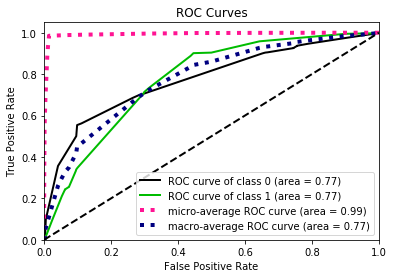

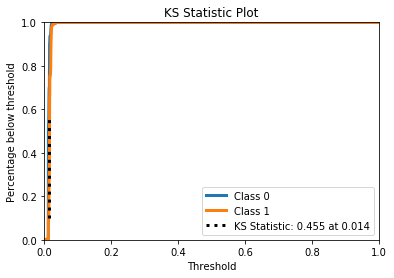

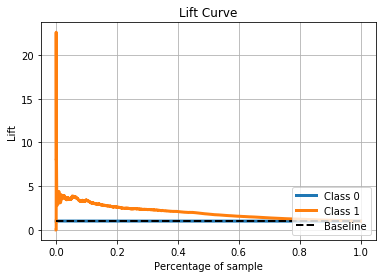

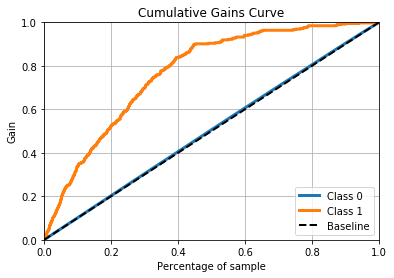

------------------------------------------------------------------------------------------------------


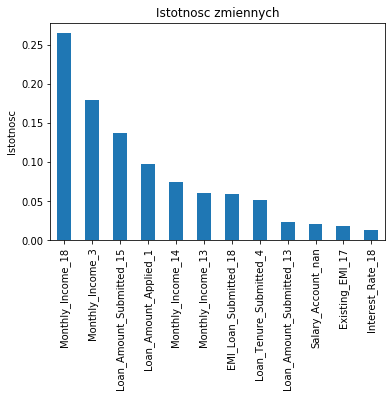

------------------------------------------------------------------------------------------------------


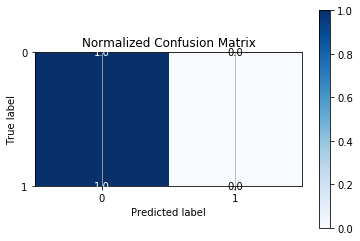

------------------------------------------------------------------------------------------------------
Mean Absolutle Error: 0.014747567608978778
Mean Squared Error: 0.014747567608978778
Root Mean Squared Error: 0.12143956360667135
Accuracy: 0.9852524323910212
AUC: 0.7748670675384256


In [339]:
print("Najlepszy gbr: %f uzywa %s" % (grid_result_gbr.best_score_,grid_result_gbr.best_params_))
print("------------------------------------------------------------------------------------------------------")
print("------------------------------------------------------------------------------------------------------")
print("gbr")
print("------------------------------------------------------------------------------------------------------")
wykresy(y_test,y_gbr_grid,'gbr')
print("------------------------------------------------------------------------------------------------------")
importance(X_train_bf,grid_result_gbr,'gbr')
print("------------------------------------------------------------------------------------------------------")
cof_matrix(y_test,y_gbr_dyscrets_grid,'gbr')
print("------------------------------------------------------------------------------------------------------")
bledy(y_test,y_gbr_grid,y_gbr_dyscrets_grid,'gbr')

In [341]:
model_stat_gbr = model_stat

In [259]:
min_samples_leaf=[5,25,30,40,50,60,70,80,90,100]
max_depth=[3,4,5,6,7]
criterion=['gini','entropy']
param_grid=dict(min_samples_leaf=min_samples_leaf,max_depth=max_depth,criterion=criterion)

clf_grid=tree.DecisionTreeClassifier()
grid=GridSearchCV(estimator=clf_grid,param_grid=param_grid)
grid_result_clf=grid.fit(X_train,y_train)
y_clf_grid=grid_result_clf.predict_proba(X_test)
y_clf_dyscrets_grid=grid_result_clf.predict(X_test)

Najlepszy clf: 0.985422 uzywa {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5}
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
clf
------------------------------------------------------------------------------------------------------


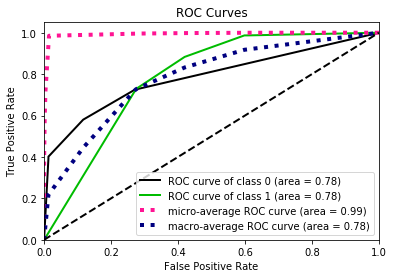

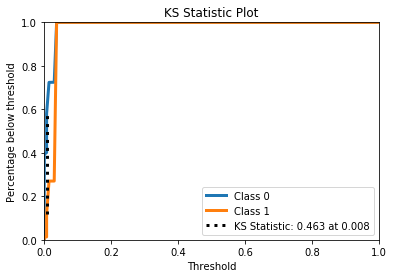

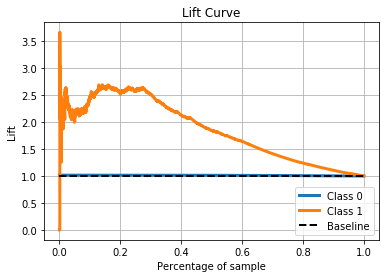

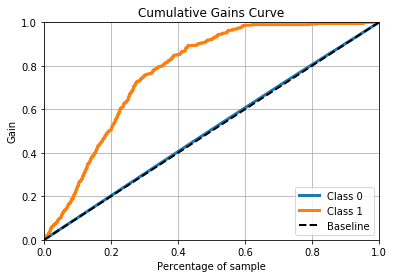

------------------------------------------------------------------------------------------------------


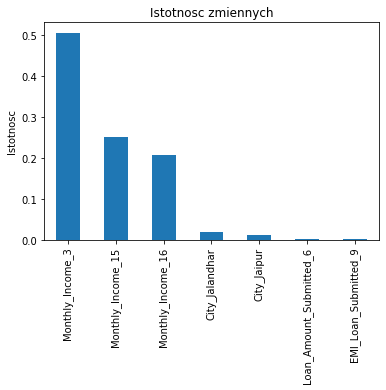

------------------------------------------------------------------------------------------------------


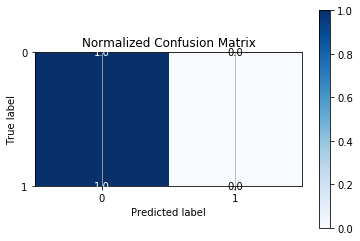

------------------------------------------------------------------------------------------------------
Mean Absolutle Error: 0.014747567608978778
Mean Squared Error: 0.014747567608978778
Root Mean Squared Error: 0.12143956360667135
Accuracy: 0.9852524323910212
AUC: 0.7827486459343697


In [342]:
print("Najlepszy clf: %f uzywa %s" % (grid_result_clf.best_score_,grid_result_clf.best_params_))
print("------------------------------------------------------------------------------------------------------")
print("------------------------------------------------------------------------------------------------------")
print("clf")
print("------------------------------------------------------------------------------------------------------")
wykresy(y_test,y_clf_grid,'clf')
print("------------------------------------------------------------------------------------------------------")
importance(X_train,grid_result_clf,'clf')
print("------------------------------------------------------------------------------------------------------")
cof_matrix(y_test,y_clf_dyscrets_grid,'clf')
print("------------------------------------------------------------------------------------------------------")
bledy(y_test,y_clf_grid,y_clf_dyscrets_grid,'clf')

In [343]:
model_stat_clf = model_stat

In [346]:
model_stat = pd.concat([model_stat_gbr,model_stat_clf])

In [401]:
C=np.logspace(-3,3,7)
penalty=["l1","l2"]
param_grid=dict(C=C,penalty=penalty)

lr_grid=LogisticRegression()
grid=GridSearchCV(estimator=lr_grid,param_grid=param_grid,cv=10)
grid_result_lr=grid.fit(X_train, y_train)
y_lr_grid=grid_result_lr.predict_proba(X_test)
y_lr_dyscrets_grid=grid_result_lr.predict(X_test)

Najlepszy lr: 0.985422 uzywa {'C': 0.001, 'penalty': 'l2'}
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
lr
------------------------------------------------------------------------------------------------------


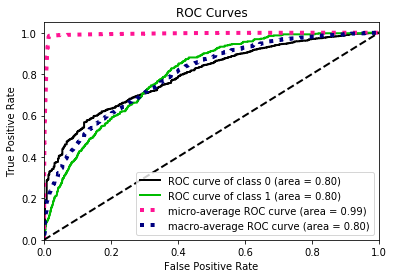

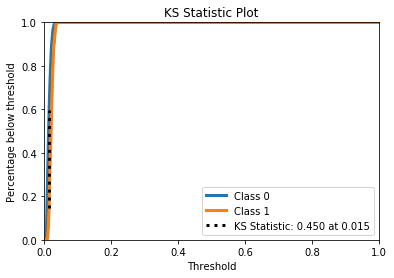

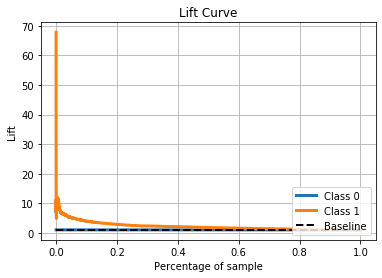

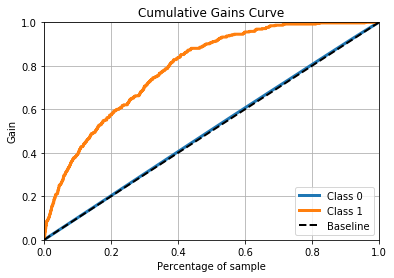

------------------------------------------------------------------------------------------------------


AttributeError: 'numpy.ndarray' object has no attribute 'plot'

In [425]:
print("Najlepszy lr: %f uzywa %s" % (grid_result_lr.best_score_,grid_result_lr.best_params_))
print("------------------------------------------------------------------------------------------------------")
print("------------------------------------------------------------------------------------------------------")
print("lr")
print("------------------------------------------------------------------------------------------------------")
wykresy(y_test,y_lr_grid,'lr')
print("------------------------------------------------------------------------------------------------------")
importance(X_train,grid_result_lr,'lr')
print("------------------------------------------------------------------------------------------------------")
cof_matrix(y_test,y_lr_dyscrets_grid,'lr')
print("------------------------------------------------------------------------------------------------------")
bledy(y_test,y_lr_grid,y_lr_dyscrets_grid,'lr')

In [360]:
model_stat_lr = model_stat

In [361]:
model_stat = pd.concat([model_stat_gbr,model_stat_clf,model_stat_lr])
model_stat

,Method,Mean Absolutle Error,Mean Squared Error,Root Mean Squared Error,Accuracy,AUC
0,gbr,0.014748,0.014748,0.12144,0.985252,0.774867
0,clf,0.014748,0.014748,0.12144,0.985252,0.782749
0,lr,0.014748,0.014748,0.12144,0.985252,0.782384


In [362]:
model_stat = pd.concat([model_stat_gbr,model_stat_clf,model_stat_lr])
model_stat

,Method,Mean Absolutle Error,Mean Squared Error,Root Mean Squared Error,Accuracy,AUC
0,gbr,0.014748,0.014748,0.12144,0.985252,0.774867
0,clf,0.014748,0.014748,0.12144,0.985252,0.782749
0,lr,0.014748,0.014748,0.12144,0.985252,0.782384


In [ ]:
gb = X_train.groupby(['Employer_Name'])
counts = gb.size().to_frame(name='count')
(counts
  .join(gb.agg({'target': 'mean'}).rename(columns={'target': 'target_mean'}))
  .join(gb.agg({'target': 'sum'}).rename(columns={'target': 'target_sum'}))
  .reset_index()
).sort_values(by='target_sum', ascending=False).head(10)

In [ ]:
gb = X_train.groupby(['Gender'])
counts = gb.size().to_frame(name='count')
(counts
  .join(gb.agg({'target': 'mean'}).rename(columns={'target': 'target_mean'}))
  .join(gb.agg({'target': 'sum'}).rename(columns={'target': 'target_sum'}))
  .reset_index()
).sort_values(by='target_sum', ascending=False).head(10)

In [ ]:
gb = X_train.groupby(['Salary_Account'])
counts = gb.size().to_frame(name='count')
(counts
  .join(gb.agg({'target': 'mean'}).rename(columns={'target': 'target_mean'}))
  .join(gb.agg({'target': 'sum'}).rename(columns={'target': 'target_sum'}))
  .reset_index()
).sort_values(by='target_sum', ascending=False).head(10)

In [ ]:
gb = X_train.groupby(['Mobile_Verified'])
counts = gb.size().to_frame(name='count')
(counts
  .join(gb.agg({'target': 'mean'}).rename(columns={'target': 'target_mean'}))
  .join(gb.agg({'target': 'sum'}).rename(columns={'target': 'target_sum'}))
  .reset_index()
).sort_values(by='target_sum', ascending=False).head(10)

In [ ]:
podstawowe_informacje_z_bazy(X_train)

In [ ]:
analiza_zmiennej = X_train[['Employer_Name','target']]

In [ ]:
analiza_zmiennej = dummies(analiza_zmiennej,'Employer_Name')

In [ ]:
cor = analiza_zmiennej.corr()
cor_target = abs(cor["target"])
relevant_features = cor_target[cor_target>0.05]
relevant_features.head(100)

In [ ]:
cor_target

In [ ]:
corr = X_train.corr()
corr.style.background_gradient(cmap='PuBu')

In [ ]:
#Using Pearson Correlation
#plt.figure(figsize=(12,10))
cor = X_train.corr()
#sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
#plt.show()

In [ ]:
#Correlation with output variable
cor_target = abs(cor["target"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.05]
relevant_features.head(100)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# Pomiar dokładności za pomocą sprawdzianu krzyżowego
# Miara jakości dokładność ACC - procent poprawnie zaklasyfikowanych obserwacji
cross_val_score(lr_clf, X_train, y_train, cv=3, scoring="accuracy")

In [ ]:
bestfeatures=SelectKBest(score_func=chi2,k=10)

In [ ]:
fit = bestfeatures.fit(X_train, y_train)

In [ ]:
dfscores=pd.DataFrame(fit.scores_)

In [ ]:
dfcolumns=pd.DataFrame(X_train.columns)

In [ ]:
featureScores=pd.concat([dfcolumns,dfscores],axis=1)

In [ ]:
featureScores.columns=['Specs','Score']

In [ ]:
print(featureScores.nlargest(10,'Score'))

In [ ]:
X_train.head()

In [ ]:
import pickle
def kategoryzacja_zmiennej(data1,data2, zmienna):
    level_grouper = DecisionTreeClassifier(min_samples_leaf=100, max_leaf_nodes=10)
    level_grouper.fit(data1[zmienna].values.reshape(-1,1), data1.target)
    filename = 'kat_zmiennej_'+zmienna+'.sav'
    pickle.dump(level_grouper, open(filename, 'wb'))
    zmienna_new=zmienna+'_kat'
    data1[zmienna_new] = level_grouper.apply(data1[zmienna].values.reshape(-1,1)).astype(str)
    loaded_model = pickle.load(open('kat_zmiennej_'+zmienna+'.sav', 'rb'))
    data2[zmienna_new] = loaded_model.apply(data2[zmienna].values.reshape(-1,1)).astype(str)

In [ ]:
kategoryzacja_zmiennej(X_train,X_test,'Monthly_Income')
kategoryzacja_zmiennej(X_train,X_test,'Loan_Amount_Applied')
kategoryzacja_zmiennej(X_train,X_test,'Loan_Tenure_Applied')
kategoryzacja_zmiennej(X_train,X_test,'Existing_EMI')')
kategoryzacja_zmiennej(X_train,X_test,'Var5')
kategoryzacja_zmiennej(X_train,X_test,'Loan_Amount_Submitted')
kategoryzacja_zmiennej(X_train,X_test,'Loan_Tenure_Submitted')
kategoryzacja_zmiennej(X_train,X_test,'Interest_Rate')
kategoryzacja_zmiennej(X_train,X_test,'Processing_Fee')
kategoryzacja_zmiennej(X_train,X_test,'EMI_Loan_Submitted')
kategoryzacja_zmiennej(X_train,X_test,'Var4')
kategoryzacja_zmiennej(X_train,X_test,'wiek')
kategoryzacja_zmiennej(X_train,X_test,'l_dni_od_LCD')

In [ ]:
def wykonaj_kategoryzacja_zmiennej(data, zmienna,model):
    onehot=pd.get_dummies(data[[zmienna]])
    loaded_model = pickle.load(open(model, 'rb'))
    data[zmienna] = loaded_model.apply(onehot).astype(str)

In [ ]:
n, bins, patches = plt.hist(x=X_train['Monthly_Income'], bins='auto', color='blue',alpha=0.7, rwidth=0.85)
plt.xlabel("Monthly_Income")
plt.show()

In [ ]:
import pickle
def kategoryzacja_zmiennej(data, zmienna):
    level_grouper = DecisionTreeClassifier(min_samples_leaf=100, max_leaf_nodes=10)
    level_grouper.fit(data[zmienna], data.target)
    filename = 'kat_zmiennej_'+zmienna+'.sav'
    pickle.dump(level_grouper, open(filename, 'wb'))
    onehot=pd.get_dummies(data[[zmienna]])
    data[zmienna] = level_grouper.apply(onehot).astype(str)
    return data

In [ ]:
onehot=pd.get_dummies(X_train[['City']])

In [ ]:
level_grouper = DecisionTreeClassifier(min_samples_leaf=100, max_leaf_nodes=10)

In [ ]:
level_grouper.fit(onehot, X_train.target)

In [ ]:
filename = 'kat_zmiennej_'+'City'+'.sav'
pickle.dump(level_grouper, open(filename, 'wb'))

In [ ]:
nowa_zmienna='City'+'_kat'
X_train[nowa_zmienna] = level_grouper.apply(onehot).astype(str)

In [ ]:
X_train.head()

In [ ]:
onehot=pd.get_dummies(X_test[['City']])

In [ ]:
loaded_model = pickle.load(open('kat_zmiennej_'+'City'+'.sav', 'rb'))

In [ ]:
loaded_model

In [ ]:
nowa_zmienna='City'+'_kat'
X_test[nowa_zmienna] = loaded_model.apply(onehot).astype(str)

In [ ]:
kategoryzacja_zmiennej(X_train, 'City')

In [ ]:
def wykonaj_kategoryzacja_zmiennej(data, zmienna,model):
    onehot=pd.get_dummies(data[[zmienna]])
    loaded_model = pickle.load(open(model, 'rb'))
    data[zmienna] = loaded_model.apply(onehot).astype(str)

In [ ]:
podstawowe_informacje_z_bazy(X_test)

In [ ]:
wykonaj_kategoryzacja_zmiennej(X_test,'City','kat_zmiennej_City.sav')

In [ ]:
X_train

In [ ]:
def dummies(df,zmienna):
    dummies = pd.get_dummies(df[zmienna], prefix = zmienna, dummy_na=True)
    df = pd.concat([df, dummies], axis = 1)
    df = df.drop([zmienna], axis=1)
    return df

In [ ]:
df = dummies(df,'Gender')
df = dummies(df,'Mobile_Verified')
df = dummies(df,'Filled_Form')
df = dummies(df,'Device_Type')
df = dummies(df,'Salary_Account')



In [ ]:
df = dummies(df,'Mobile_Verified')

In [ ]:
df = dummies(df,'Filled_Form')

In [ ]:
df = dummies(df,'Device_Type')

In [ ]:
df = dummies(df,'Salary_Account')

In [ ]:
def data_rok(df,zmienna,nowa_zmienna):
    df[zmienna] = pd.to_datetime(df[zmienna], errors='coerce', dayfirst=True)
    today = pd.to_datetime('now')
    df[nowa_zmienna] = (today.year - df[zmienna].dt.year) - ((today.month - df[zmienna].dt.month) <0)
    df = df.drop([zmienna], axis=1)
    return df

In [ ]:
df = data_rok(df,'DOB','wiek')

In [ ]:
def data_dzien(df,zmienna,nowa_zmienna):
    df[zmienna] = pd.to_datetime(df[zmienna], errors='coerce', dayfirst=True)
    today = pd.to_datetime('now')
    df[nowa_zmienna] = (today - df[zmienna]).astype('timedelta64[D]').astype(int)
    df = df.drop([zmienna], axis=1)
    return df

In [ ]:
df = data_dzien(df,'Lead_Creation_Date','l_dni_od_LCD')

In [ ]:
podstawowe_informacje_z_bazy(df)

In [ ]:
for zmienne in df.columns.tolist():
    unikalne_wartosci(zmienne)

In [ ]:
X = df  
y = df.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=1234)

In [ ]:
def imputacja_avg(zmienna):
    avg = X_train[zmienna].mean()
    X_train[zmienna]=X_train[zmienna].apply(lambda x: avg if pd.isnull(x)  else x)
    X_test[zmienna]=X_test[zmienna].apply(lambda x: avg if pd.isnull(x)  else x)
    return avg

In [ ]:
imputacja_avg('Loan_Amount_Applied')
imputacja_avg('Loan_Tenure_Applied')
imputacja_avg('Existing_EMI')
imputacja_avg('Loan_Amount_Submitted')
imputacja_avg('Loan_Tenure_Submitted')
imputacja_avg('Interest_Rate')
imputacja_avg('Processing_Fee')
imputacja_avg('EMI_Loan_Submitted')

In [ ]:
podstawowe_informacje_z_bazy(X_train)

In [ ]:
df.head(100)

In [ ]:
def plot_bar(column):
    # temp df 
    temp_1 = pd.DataFrame()
    # count categorical values
    temp_1['No_loan'] = df[df['Disbursed'] == 0][column].value_counts()
    temp_1['Yes_loan'] = df[df['Disbursed'] == 1][column].value_counts()
    temp_1.plot(kind='bar')
    plt.xlabel(f'{column}')
    plt.ylabel('Number of clients')
    plt.title('Distribution of {} and loan'.format(column))
    plt.show();

In [ ]:
# wykres histogramów dla zmiennych numerycznych
df.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
def unikalne_wartosci(zmienna):
    print('{} - liczba unikalnych wartosci: {}, liczba powtarzających wartosci: {}'.format(zmienna, df[zmienna].nunique(),df[zmienna].count()))

In [ ]:
unikalne_wartosci('ID')

In [ ]:
for zmienne in df.columns unikalne_wartosci(df.columns)

In [ ]:
# Build a function to show categorical values disribution
def plot_bar(column):
    # temp df 
    temp_1 = pd.DataFrame()
    # count categorical values
    temp_1['No_loan'] = df[df['Disbursed'] == 0][column].value_counts()
    temp_1['Yes_loan'] = df[df['Disbursed'] == 1][column].value_counts()
    temp_1.plot(kind='bar')
    plt.xlabel(f'{column}')
    plt.ylabel('Number of clients')
    plt.title('Distribution of {} and loan'.format(column))
    plt.show();

In [ ]:
plot_bar('Gender')
plot_bar('City')
plot_bar('DOB')
plot_bar('Lead_Creation_Date')
plot_bar('Employer_Name')
plot_bar('Salary_Account')
plot_bar('Mobile_Verified')
plot_bar('Var1')
plot_bar('Filled_Form')
plot_bar('Device_Type')
plot_bar('Var2')


In [ ]:
# Build correlation matrix
corr = df.corr()
corr.style.background_gradient(cmap='PuBu')

In [ ]:
df['Gender'].unique()
df['City'].unique()
df['DOB'].unique()
df['Lead_Creation_Date'].unique()
df['Employer_Name'].unique()
df['Salary_Account'].unique()
df['Mobile_Verified'].unique()
df['Var1'].unique()
df['Filled_Form'].unique()
df['Device_Type'].unique()
df['Var2'].unique()

In [ ]:
print(data_all2.columns.tolist())